In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

## __1 - Business Problem__  
___Forecast the airlines data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting___  

## __2 - Data collection and description__ 

In [67]:
df = pd.read_csv("Airlines+Data.csv")

In [68]:
df1 = df.copy()

In [69]:
df1.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [70]:
df1.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [71]:
df1.dtypes

Month         object
Passengers     int64
dtype: object

In [72]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [73]:
df1 = df1.set_index('Month')

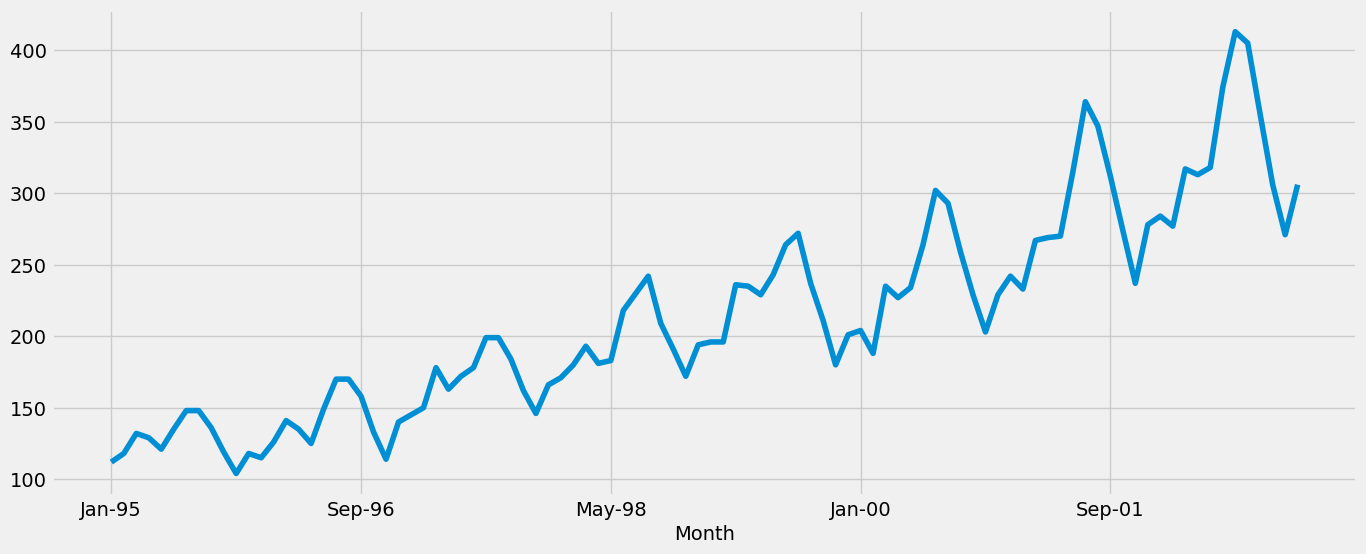

In [74]:
df1['Passengers'].plot(figsize=(15, 6))
plt.show()

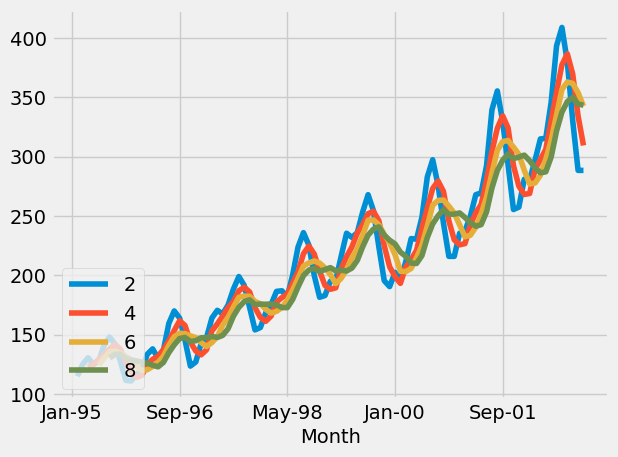

In [75]:
for i in range(2,10,2):
    df1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

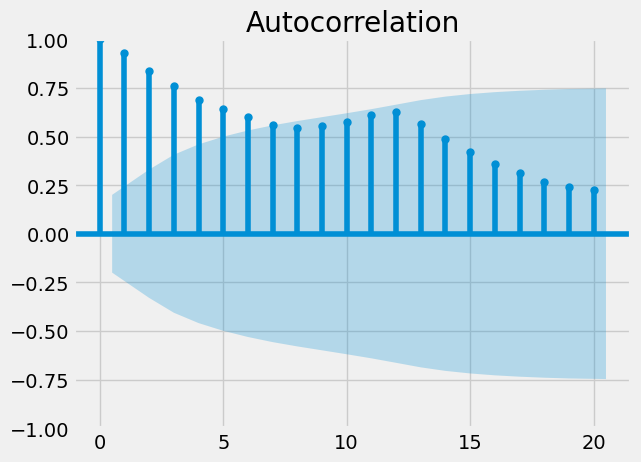

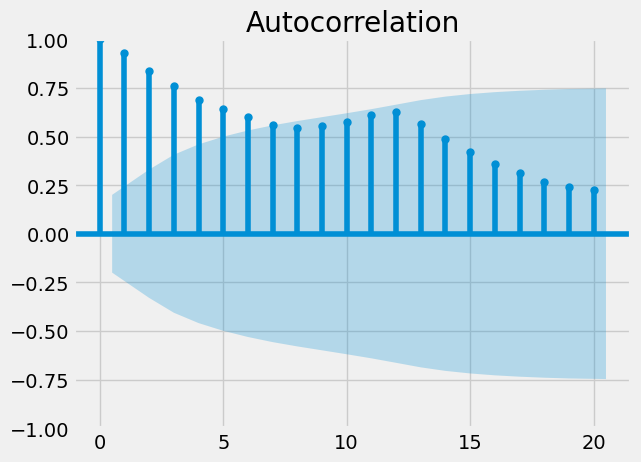

In [76]:
tsa_plots.plot_acf(df1['Passengers'])

## __3 - Building Time series forecasting with ARIMA__ 

In [77]:
X = df1['Passengers'].values

In [78]:
size = int(len(X) * 0.66)

In [79]:
train, test = X[0:size], X[size:len(X)]

### __3.1 - Rolling Forecast ARIMA Model__ 

In [80]:
history = [x for x in train]

In [81]:
predictions = list()

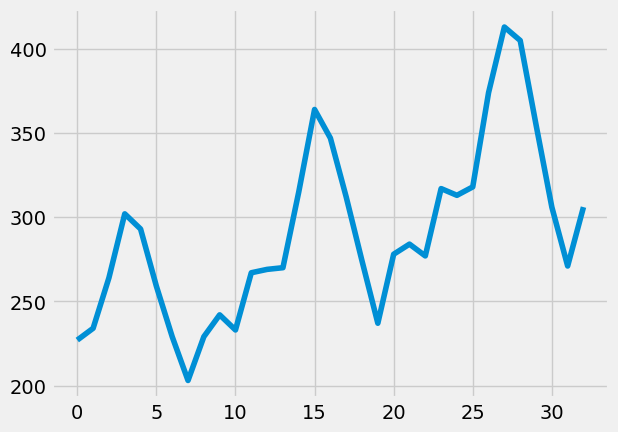

In [85]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale  

## __4 - Comparing Multiple Models__ 

In [86]:
df2 = df.copy()

In [87]:
df2 = pd.get_dummies(df2, columns = ['Month'])

In [88]:
df2.head()

,Passengers,Month_Apr-00,Month_Apr-01,Month_Apr-02,Month_Apr-95,Month_Apr-96,Month_Apr-97,Month_Apr-98,Month_Apr-99,Month_Aug-00,...,Month_Oct-98,Month_Oct-99,Month_Sep-00,Month_Sep-01,Month_Sep-02,Month_Sep-95,Month_Sep-96,Month_Sep-97,Month_Sep-98,Month_Sep-99
0,112,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df2.shape

(96, 97)

In [90]:
t= np.arange(1,97)

In [91]:
df2['t'] = t

In [92]:
df2['t_sq'] = df2['t']*df2['t']

In [93]:
log_Passengers=np.log(df2['Passengers'])

In [94]:
df2['log_Passengers']=log_Passengers

In [95]:
df2.head()

,Passengers,Month_Apr-00,Month_Apr-01,Month_Apr-02,Month_Apr-95,Month_Apr-96,Month_Apr-97,Month_Apr-98,Month_Apr-99,Month_Aug-00,...,Month_Sep-01,Month_Sep-02,Month_Sep-95,Month_Sep-96,Month_Sep-97,Month_Sep-98,Month_Sep-99,t,t_sq,log_Passengers
0,112,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791


In [96]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

In [97]:
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648351

In [98]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.18955514415471

In [99]:
expo=smf.ols('Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.6030945933278588e+128